In [1]:
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, classification_report
from utils.dataset_loader import load_dataset

twitter_data = load_dataset("data/twitterDataset.csv")


target
1    30005
0    29995
Name: count, dtype: int64


<Axes: xlabel='target', ylabel='count'>

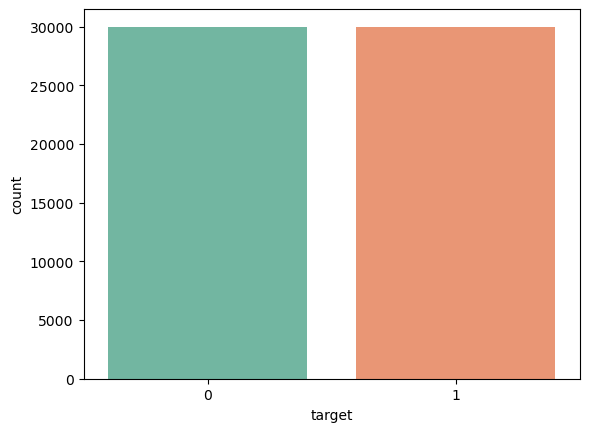

In [14]:
# ********* positive, negative split ***********

import seaborn as sns 

sns.countplot(x="target",data=twitter_data, palette="Set2")


In [15]:
# ************* Preprocessing ****************

from preprocessing.data_preprocessing import tweets_processed

twitter_data['processed_text'] = twitter_data['text'].apply(tweets_processed)

# Remove rows where preprocessed text = None
twitter_data = twitter_data.dropna(subset=['processed_text'])

# Reset the index
twitter_data = twitter_data.reset_index(drop=True)


In [16]:
# *************** Split Dataset **************

X = twitter_data['processed_text'].values
Y = twitter_data['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
print(X.shape, X_train.shape, X_test.shape)


(59996,) (47996,) (12000,)


In [17]:
tfidf_vec = TfidfVectorizer()

In [18]:
# *********** VADER ***********
import pandas as pd

from models.VADER import check_vader_polarity

vader_polarity = pd.Series(X).apply(check_vader_polarity)


In [19]:
report = classification_report(Y, vader_polarity)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.66      0.65     29994
           1       0.65      0.62      0.63     30002

    accuracy                           0.64     59996
   macro avg       0.64      0.64      0.64     59996
weighted avg       0.64      0.64      0.64     59996



In [20]:

accuracy_vader = accuracy_score(Y, vader_polarity)
precision_vader = precision_score(Y, vader_polarity)

print("Accuracy vader",accuracy_vader)
print("Precision vader",precision_vader)


Accuracy vader 0.6397426495099673
Precision vader 0.6460611548373616


In [21]:
# ************ Multinomial Naive Bayes ***********

from models.naive_bayes_model import calc_naive_bayes

pred_nb = calc_naive_bayes(X_train, X_test, y_train, tfidf_vec)


In [22]:
report = classification_report(y_test, pred_nb)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      5999
           1       0.76      0.71      0.73      6001

    accuracy                           0.74     12000
   macro avg       0.74      0.74      0.74     12000
weighted avg       0.74      0.74      0.74     12000



In [23]:
accuracy_nb = accuracy_score(y_test, pred_nb)
print("Naive Bayes Accuracy",accuracy_nb)

precision_nb = precision_score(y_test, pred_nb)
print("Naive Bayes Precision", precision_nb)


Naive Bayes Accuracy 0.7414166666666666
Naive Bayes Precision 0.7571884984025559


In [24]:
improved_accuracy_nb = accuracy_nb - accuracy_vader
improved_precision_nb = precision_nb - precision_vader

print("Improved Naive Bayes Accuracy compared to VADER", improved_accuracy_nb)
print("Improved Naive Bayes Precision compared to VADER", improved_precision_nb)


Improved Naive Bayes Accuracy compared to VADER 0.10167401715669933
Improved Naive Bayes Precision compared to VADER 0.11112734356519427


In [25]:
# ********** Support Vector Machine ***********

from models.svm_model import calc_svm

pred_svm = calc_svm(X_train, X_test, y_train)

In [26]:
report = classification_report(y_test, pred_svm)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      5999
           1       0.74      0.78      0.76      6001

    accuracy                           0.75     12000
   macro avg       0.75      0.75      0.75     12000
weighted avg       0.75      0.75      0.75     12000



In [27]:
accuracy_svm = accuracy_score(y_test, pred_svm)
precision_svm = precision_score(y_test, pred_svm)

print("Accuracy SVM",accuracy_svm)
print("Precision SVM", precision_svm)


Accuracy SVM 0.7534166666666666
Precision SVM 0.741581956797967


In [28]:
improved_accuracy_svm = accuracy_svm - accuracy_vader
improved_precision_svm = precision_svm - precision_vader

print("Improved SVM Accuracy compared to VADER", improved_accuracy_svm)
print("Improved SVM Precision compared to VADER", improved_precision_svm)



Improved SVM Accuracy compared to VADER 0.11367401715669934
Improved SVM Precision compared to VADER 0.09552080196060542


In [29]:
# ************** Logistic Regression ************
from models.logistic_regression_model import calc_log_reg

logisticreg_pred = calc_log_reg(X_train, X_test, y_train, tfidf_vec)


In [30]:
report = classification_report(y_test, logisticreg_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      5999
           1       0.75      0.77      0.76      6001

    accuracy                           0.76     12000
   macro avg       0.76      0.76      0.76     12000
weighted avg       0.76      0.76      0.76     12000



In [31]:
accuracy_logistic_reg = accuracy_score(y_test, logisticreg_pred)
precision_logistic_reg = precision_score(y_test, logisticreg_pred)

print("Accuracy Logistic Regression",accuracy_logistic_reg)
print("Precision Logistic Regression", precision_logistic_reg)


Accuracy Logistic Regression 0.7573333333333333
Precision Logistic Regression 0.7501214574898786


In [32]:
improved_accuracy_logreg = accuracy_logistic_reg - accuracy_vader
improved_precision_logreg = precision_logistic_reg - precision_vader

print("Improved Logistic Regression Accuracy compared to VADER", improved_accuracy_logreg)
print("Improved Logistic Regression Precision compared to VADER", improved_precision_logreg)



Improved Logistic Regression Accuracy compared to VADER 0.11759068382336602
Improved Logistic Regression Precision compared to VADER 0.10406030265251698


In [33]:
# ********* Long Short-Term Memory ***********

from models.lstm_model import calc_lstm

all_texts = twitter_data['processed_text']
all_labels = twitter_data['target']
y_pred_lstm, y_test_lstm = calc_lstm(all_texts, all_labels)


Epoch 1/50
675/675 - 52s - 77ms/step - accuracy: 0.6900 - loss: 0.6960 - val_accuracy: 0.7240 - val_loss: 0.5801
Epoch 2/50
675/675 - 50s - 74ms/step - accuracy: 0.7163 - loss: 0.5798 - val_accuracy: 0.7254 - val_loss: 0.5731
Epoch 3/50
675/675 - 50s - 74ms/step - accuracy: 0.7251 - loss: 0.5659 - val_accuracy: 0.7237 - val_loss: 0.5598
Epoch 4/50
675/675 - 49s - 73ms/step - accuracy: 0.7312 - loss: 0.5577 - val_accuracy: 0.7381 - val_loss: 0.5509
Epoch 5/50
675/675 - 51s - 76ms/step - accuracy: 0.7362 - loss: 0.5513 - val_accuracy: 0.7398 - val_loss: 0.5475
Epoch 6/50
675/675 - 47s - 70ms/step - accuracy: 0.7391 - loss: 0.5468 - val_accuracy: 0.7406 - val_loss: 0.5426
Epoch 7/50
675/675 - 48s - 71ms/step - accuracy: 0.7414 - loss: 0.5422 - val_accuracy: 0.7206 - val_loss: 0.5645
Epoch 8/50
675/675 - 48s - 71ms/step - accuracy: 0.7427 - loss: 0.5410 - val_accuracy: 0.7352 - val_loss: 0.5428
Epoch 9/50
675/675 - 47s - 70ms/step - accuracy: 0.7454 - loss: 0.5369 - val_accuracy: 0.7435 - 

In [34]:
report = classification_report(y_test_lstm, y_pred_lstm)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      6050
           1       0.75      0.76      0.75      5950

    accuracy                           0.75     12000
   macro avg       0.75      0.75      0.75     12000
weighted avg       0.75      0.75      0.75     12000



In [35]:
accuracy_lstm = accuracy_score(y_test_lstm, y_pred_lstm)
precision_lstm = precision_score(y_test_lstm, y_pred_lstm)

print("Accuracy:", accuracy_lstm)
print("Precision:", precision_lstm)

Accuracy: 0.7531666666666667
Precision: 0.7453201970443349


In [36]:
improved_accuracy_lstm = accuracy_lstm - accuracy_vader
improved_precision_lstm = precision_lstm - precision_vader

print("Improved LSTM Accuracy compared to VADER", improved_accuracy_lstm)
print("Improved LSTM Precision compared to VADER", improved_precision_lstm)


Improved LSTM Accuracy compared to VADER 0.11342401715669936
Improved LSTM Precision compared to VADER 0.09925904220697335


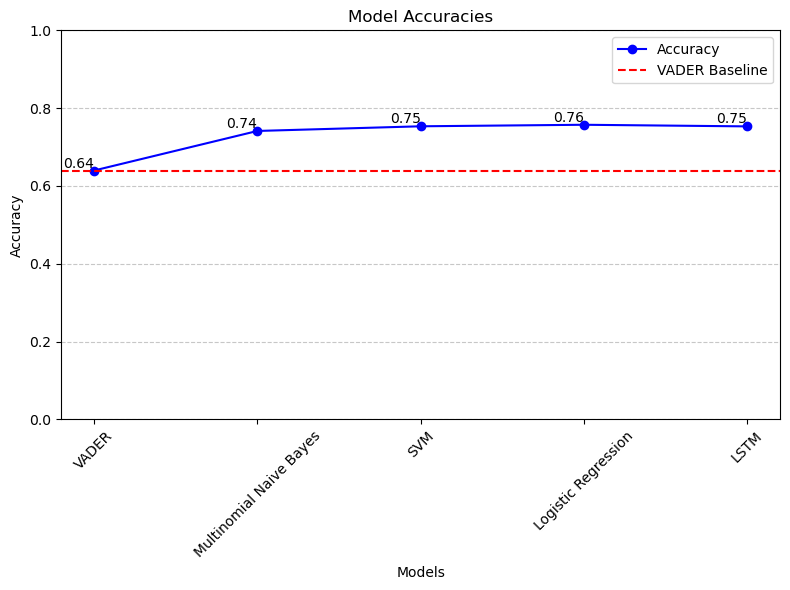

In [57]:
# ************ Compare Accuracies and Precisions ***********

import matplotlib.pyplot as plt

# Model names
models = ['VADER', 'Multinomial Naive Bayes', 'SVM', 'Logistic Regression', 'LSTM' ]

accuracies = [accuracy_vader, accuracy_nb, accuracy_svm, accuracy_logistic_reg, accuracy_lstm]

# Plotting the graph
plt.figure(figsize=(8, 6))

# Plot accuracy scores
plt.plot(models, accuracies, marker='o', color='blue', linestyle='-', label='Accuracy')

# Add a horizontal line
plt.axhline(y=accuracy_vader, color='red', linestyle='--', label='VADER Baseline')

plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1) 
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i in range(len(models)):
    plt.text(models[i], accuracies[i], f'{accuracies[i]:.2f}', ha='right', va='bottom')

plt.tight_layout()
plt.show()




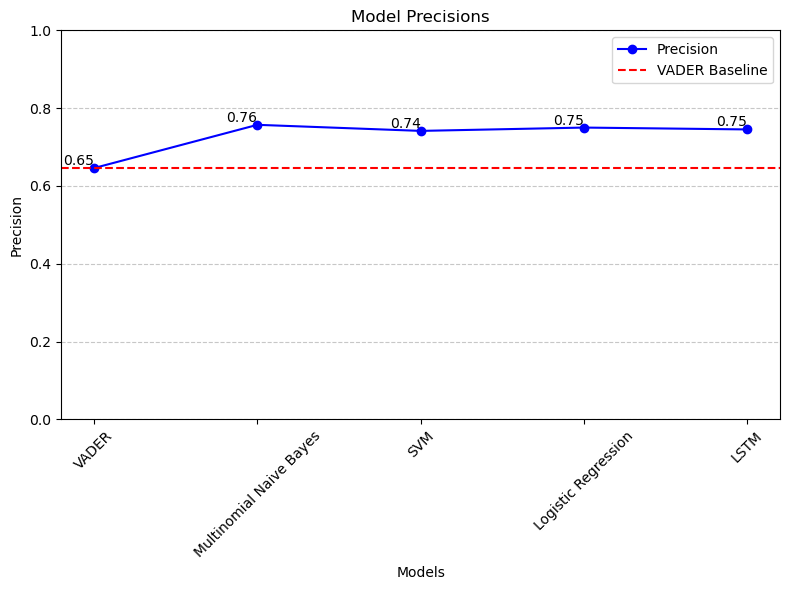

In [58]:


# Model names
models = ['VADER', 'Multinomial Naive Bayes', 'SVM', 'Logistic Regression', 'LSTM' ]

precisions = [precision_vader, precision_nb, precision_svm, precision_logistic_reg, precision_lstm]

# Plotting the graph
plt.figure(figsize=(8, 6))

# Plot precision scores
plt.plot(models, precisions, marker='o', color='blue', linestyle='-', label='Precision')
plt.axhline(y=precision_vader, color='red', linestyle='--', label='VADER Baseline')  # Add a horizontal line for VADER

plt.title('Model Precisions')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0, 1)
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i in range(len(models)):
    plt.text(models[i], precisions[i], f'{precisions[i]:.2f}', ha='right', va='bottom')

plt.tight_layout()
plt.show()